# Kaggle Competition Peer Review

***

## Project Description

Goal:  The purpose of this project is not that you "solve" a given Kaggle competition - but that you experience approaching a problem, creating a solution, evaluating it, and making some attempt on improving it.  

### Part 1: Problem Description. Give the name of the competition you selected and write a few sentences describing the competition problem as you interpreted it. You want your writeup to be self-contained so your peer-reviewer does not need to go to Kaggle to study the competition description. Clarity is more important than detail. What's the overall goal? What does the data look like? How will the results be evaluated?

The competition is called Heart Failure Prediction. The aim is to predict heart failure from 12 features in the dataset. The dataset has 299 observations. It has age, Level of the CPK enzyme and diabetes.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Age |	|
|anaemia |Decrease of red blood cells or hemoglobin (boolean)	|
|creatinine_phosphokinase |Level of the CPK enzyme in the blood (mcg/L)	|
|diabetes |If the patient has diabetes (boolean)	|
|ejection_fraction |Percentage of blood leaving the heart at each contraction (percentage)	|
|high_blood_pressure |If the patient has hypertension (boolean)	|
|platelets |Platelets in the blood (kiloplatelets/mL)	|
|serum_creatinine |Level of serum creatinine in the blood (mg/dL)	|
|serum_sodium |Level of serum sodium in the blood (mEq/L)	|
|sex |Woman or man (binary)	|
|smoking |If the patient smokes or not (boolean)	|
|time |Follow-up period (days)	|
|DEATH_EVENT |If the patient deceased during the follow-up period (boolean)	|

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


### Part 2: Analysis Approach.  Write a few sentences describing how you approached the problem. What techniques did you use? Clarity is more important than technical depth in this exercise.  

I will start looking at the dataset, read and understand the feature descriptions. I will draw graphs to visualize the data and look at relationships. I decided to use anamenia, diabetes, high blood pressure, sex and smoking as a starting point.

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,280,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], dtype='object')

### Groupby Function

In [7]:
df.groupby(["DEATH_EVENT"]).median()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,60.00,0.00,245.00,0.00,38.00,0.00,263000.00,1.00,137.00,1.00,0.00,172.00
1,65.00,0.00,259.00,0.00,30.00,0.00,258500.00,1.30,135.50,1.00,0.00,44.50


## Data Visualization

### Univariate Data Exploration

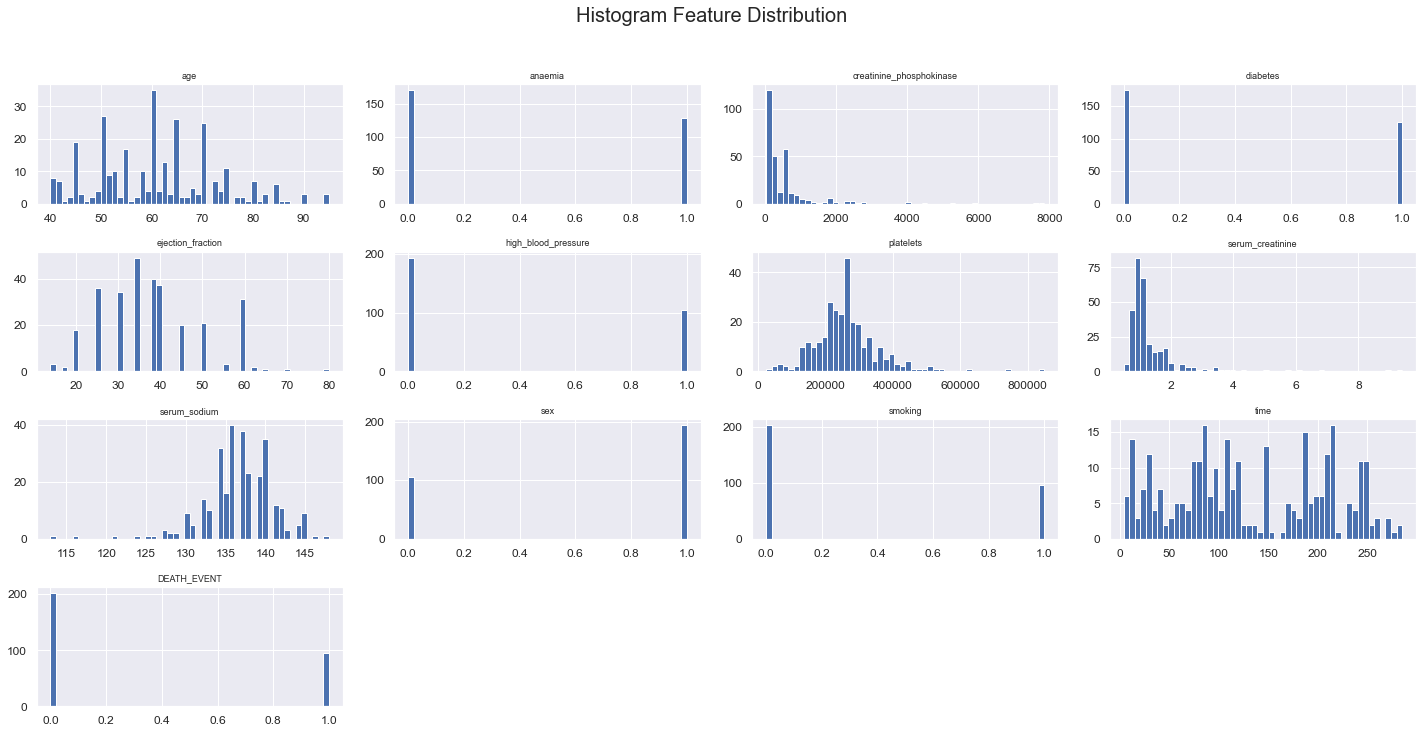

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

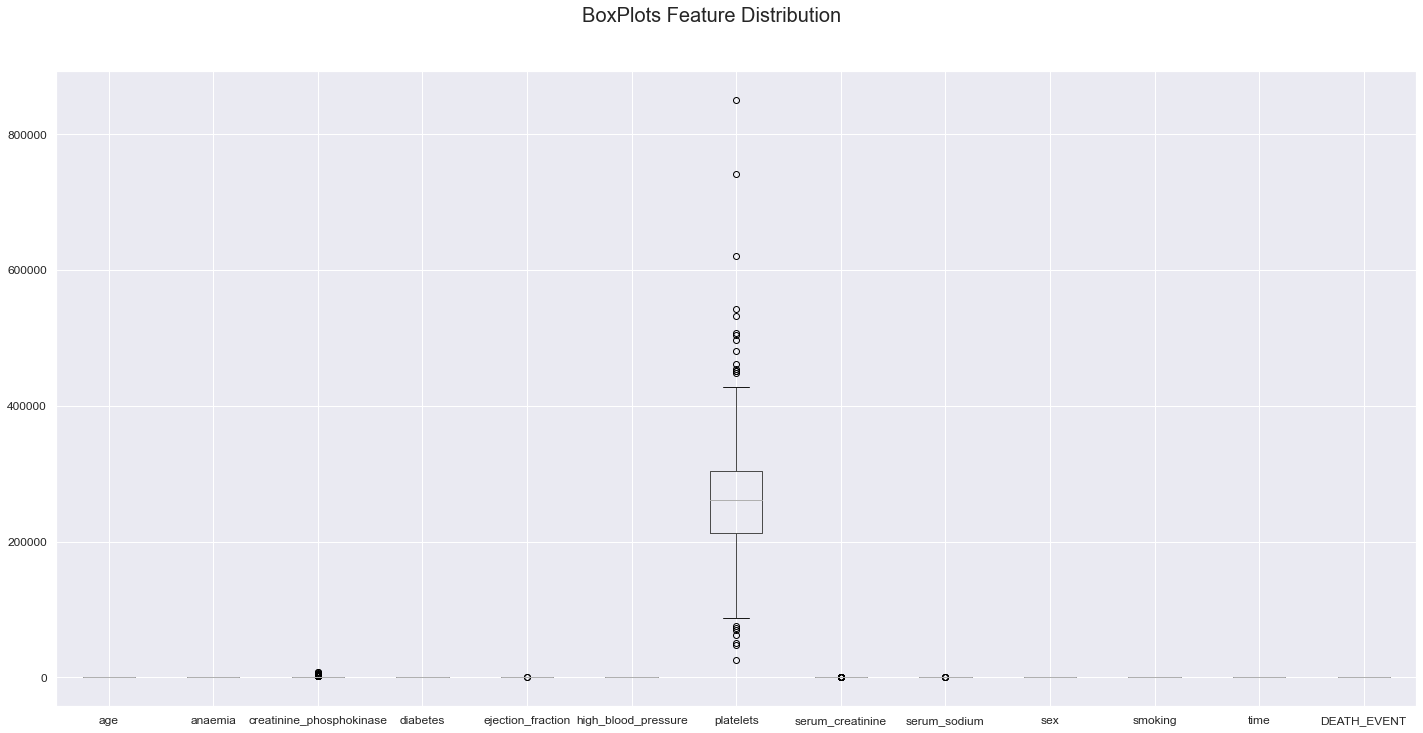

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], dtype='object')

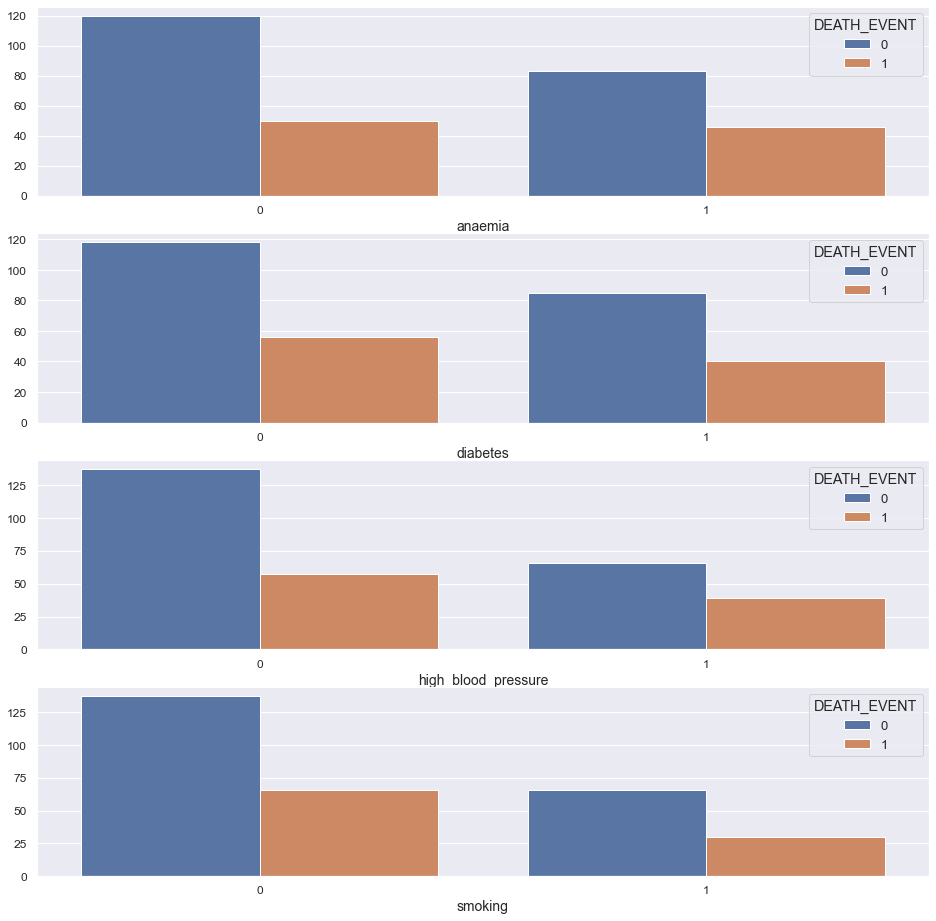

In [11]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.countplot(x="anaemia", hue="DEATH_EVENT", data=df, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("anaemia")
ax[0].set_ylabel("")

sns.countplot(x="diabetes", hue="DEATH_EVENT", data=df, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("diabetes")
ax[1].set_ylabel("")

sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", data=df, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("high_blood_pressure")
ax[2].set_ylabel("")

sns.countplot(x="smoking", hue="DEATH_EVENT", data=df, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("smoking")
ax[3].set_ylabel("")

plt.show()

## Time-Series Analysis

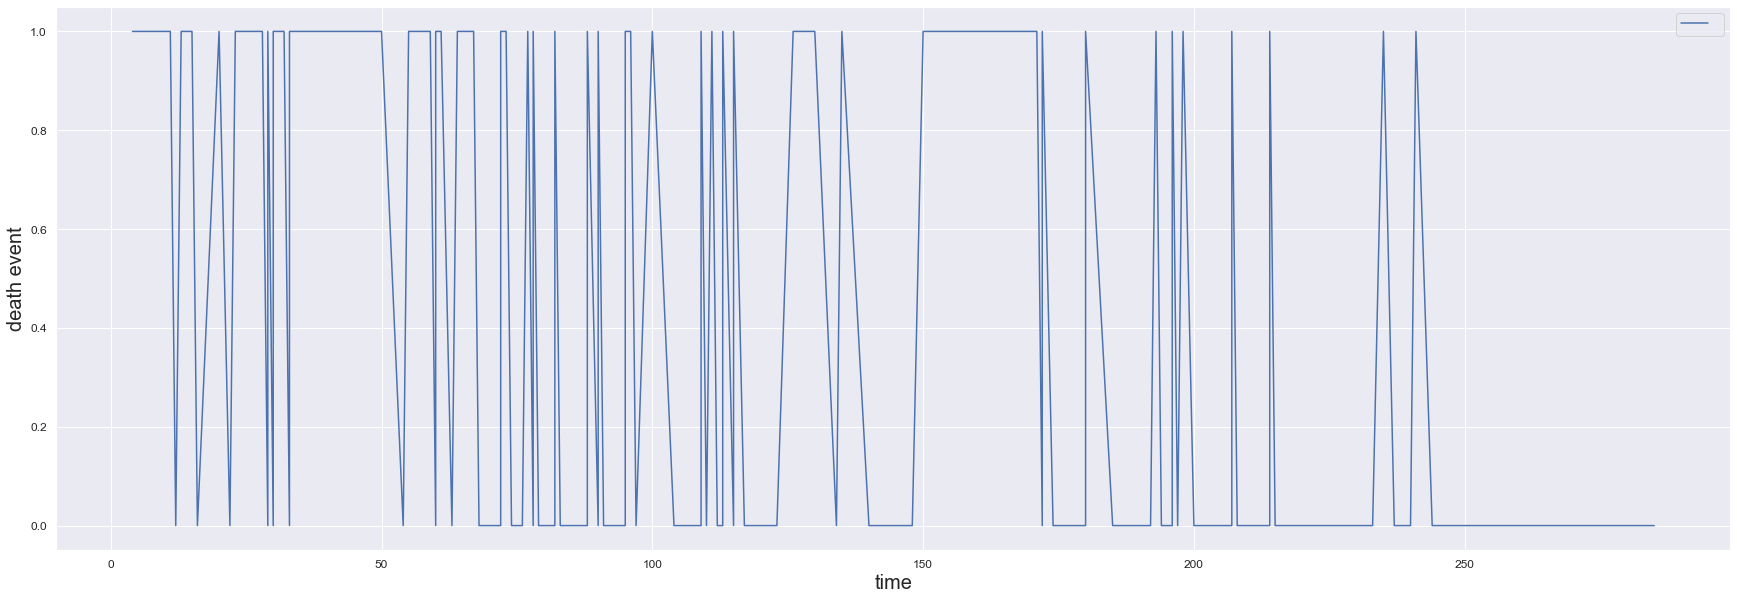

In [12]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.time,y=df.DEATH_EVENT,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("time", fontsize=20)
plt.ylabel("death event", fontsize=20)
plt.legend(['',''])
plt.show()

### Correlation

In [13]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


In [14]:
df.corr()["DEATH_EVENT"].sort_values()

time                       -0.53
ejection_fraction          -0.27
serum_sodium               -0.20
platelets                  -0.05
smoking                    -0.01
sex                        -0.00
diabetes                   -0.00
creatinine_phosphokinase    0.06
anaemia                     0.07
high_blood_pressure         0.08
age                         0.25
serum_creatinine            0.29
DEATH_EVENT                 1.00
Name: DEATH_EVENT, dtype: float64

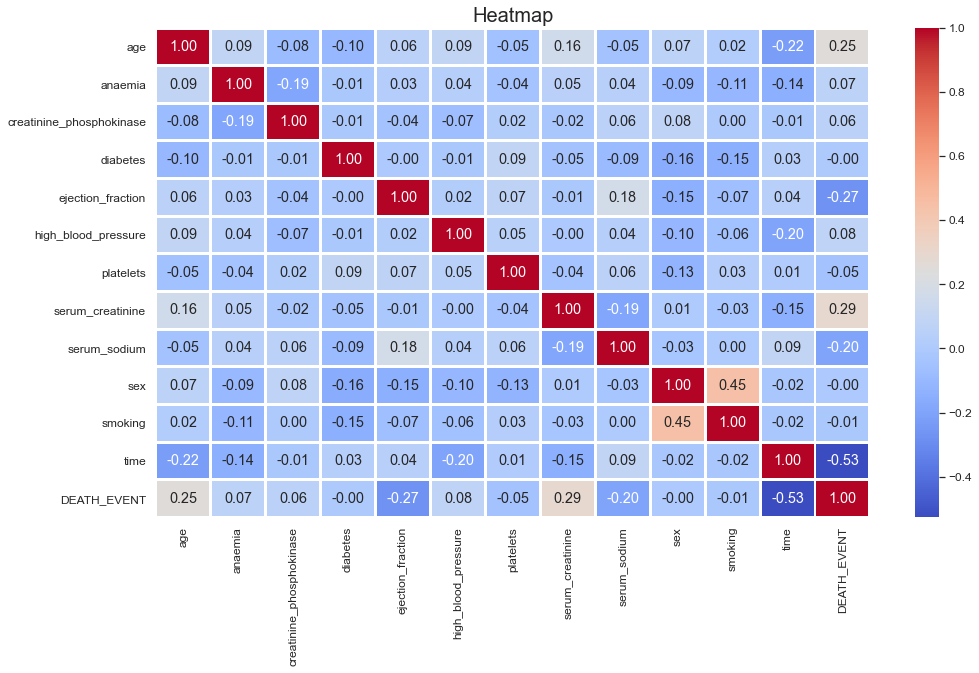

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Heatmap", fontsize=20)
plt.show()

### Part 3: Initial Solution. Write a few sentences describing how you implemented your approach. Think of it as a whiteboard conversation or a descriptive forum post rather than a full technical report. Try to provide enough detail for someone with some experience to follow your recipe and reproduce your results: Describe how you prepared the data, the method(s) you applied, and any tools you used (not detailed code).    What languages and libraries did you use? What challenges did you run into?

I selected the features to be used for the prediction. 

I split the dataset into 80% training set and 20% testing set

I used Logistic Regression algorithm to predict and using Python code.

### Drop unwanted features

In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], dtype='object')

In [17]:
df2 = df[['anaemia', 'diabetes', 'high_blood_pressure','sex', 'smoking', 'DEATH_EVENT']]
df2

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [18]:
df3 = df[['age','creatinine_phosphokinase','ejection_fraction', 
          'platelets', 'serum_creatinine', 'serum_sodium','DEATH_EVENT' ]]
df3

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.00,582,20,265000.00,1.90,130,1
1,55.00,7861,38,263358.03,1.10,136,1
2,65.00,146,20,162000.00,1.30,129,1
3,50.00,111,20,210000.00,1.90,137,1
4,65.00,160,20,327000.00,2.70,116,1
...,...,...,...,...,...,...,...
294,62.00,61,38,155000.00,1.10,143,0
295,55.00,1820,38,270000.00,1.20,139,0
296,45.00,2060,60,742000.00,0.80,138,0
297,45.00,2413,38,140000.00,1.40,140,0


### Treat Missing Values

In [19]:
df2.isnull().sum()

anaemia                0
diabetes               0
high_blood_pressure    0
sex                    0
smoking                0
DEATH_EVENT            0
dtype: int64

In [20]:
df3.isnull().sum()

age                         0
creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
DEATH_EVENT                 0
dtype: int64

### Save to CSV

In [21]:
#df2.to_csv("train1.csv", index=False)

In [22]:
#df3.to_csv("train2.csv", index=False)

## Regression Analysis

### Part 4: Initial Solution Analysis. Write a few sentences assessing your approach. Did it work? What do you think the problems were?

The approach did not work well. The model failed to predict a single death event. I will try to include other features in.

## Logistic Regression (StatsModel)

In [23]:
df2.columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'], dtype='object')

In [24]:
y = df2[['DEATH_EVENT']]
X = df2[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

In [25]:
X = sm.add_constant(X)

In [26]:
model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.622479
         Iterations 5


In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                0.008275
Time:                        10:04:26   Log-Likelihood:                -186.12
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                    0.6836
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0282      0.309     -3.331      0.001      -1.633      -0.423
anaemia                 0.2763      0.252      1.096      0.273      -0.218       0.770
diabetes                0.0051      0.257      0.020      0.984      -0.498       0.509
high_blood_pressure     0.3459      0.258      1.339      0.181      -0.161       0.852
sex                     0.0603      0.294      0.205      0.837      -0.515       0.636
smoking                -0.0337      0.300     -0.112      0.911      -0.622       0.554
=======================================================================================
"""

In [28]:
logitfit1 = smf.logit(formula = 'DEATH_EVENT ~ C(anaemia) + C(diabetes) + C(high_blood_pressure) \
                     + C(sex) + C(smoking)', data = df2).fit()

Optimization terminated successfully.
         Current function value: 0.622479
         Iterations 5


In [29]:
logitfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                0.008275
Time:                        10:04:27   Log-Likelihood:                -186.12
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                    0.6836
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.0282      0.309     -3.331      0.001      -1.633      -0.423
C(anaemia)[T.1]                 0.2763      0.252      1.096      0.273      -0.218       0.770
C(diabetes)[T.1]                0.0051      0.257      0.020      0.984      -0.498       0.509
C(high_blood_pressure)[T.1]     0.3459      0.258      1.339      0.181      -0.161       0.852
C(sex)[T.1]                     0.0603      0.294      0.205      0.837      -0.515       0.636
C(smoking)[T.1]                -0.0337      0.300     -0.112      0.911      -0.622       0.554
===============================================================================================
"""

# --------------------------------------------------------

In [30]:
df3.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT'], dtype='object')

In [31]:
y = df3[['DEATH_EVENT']]
X = df3[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

In [32]:
X = sm.add_constant(X)

In [33]:
model2 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.502845
         Iterations 6


In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  0.1989
Time:                        10:04:27   Log-Likelihood:                -150.35
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 4.536e-14
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3720      4.512      0.969      0.333      -4.471      13.215
age                          0.0534      0.013      4.253      0.000       0.029       0.078
creatinine_phosphokinase     0.0002      0.000      1.550      0.121   -5.53e-05       0.000
ejection_fraction           -0.0668      0.014     -4.617      0.000      -0.095      -0.038
platelets                -1.038e-07   1.53e-06     -0.068      0.946   -3.09e-06    2.89e-06
serum_creatinine             0.6288      0.160      3.924      0.000       0.315       0.943
serum_sodium                -0.0513      0.033     -1.556      0.120      -0.116       0.013
============================================================================================
"""

In [35]:
logitfit2 = smf.logit(formula = 'DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + platelets + \
                      serum_creatinine + serum_sodium', data = df3).fit()

Optimization terminated successfully.
         Current function value: 0.502845
         Iterations 6


In [36]:
logitfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  0.1989
Time:                        10:04:27   Log-Likelihood:                -150.35
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 4.536e-14
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.3720      4.512      0.969      0.333      -4.471      13.215
age                          0.0534      0.013      4.253      0.000       0.029       0.078
creatinine_phosphokinase     0.0002      0.000      1.550      0.121   -5.53e-05       0.000
ejection_fraction           -0.0668      0.014     -4.617      0.000      -0.095      -0.038
platelets                -1.038e-07   1.53e-06     -0.068      0.946   -3.09e-06    2.89e-06
serum_creatinine             0.6288      0.160      3.924      0.000       0.315       0.943
serum_sodium                -0.0513      0.033     -1.556      0.120      -0.116       0.013
============================================================================================
"""

### Logistic Regression (SKLearn)

In [37]:
df2.shape

(299, 6)

In [38]:
X = df2.iloc[:,:5]
y = df2.iloc[:,5]

In [39]:
Counter(y)

Counter({1: 96, 0: 203})

In [40]:
X.values, y.values

(array([[0, 0, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1],
        ...,
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1]], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 5), (60, 5), (239,), (60,))

In [43]:
Counter(y_train), Counter(y_test)

(Counter({0: 162, 1: 77}), Counter({0: 41, 1: 19}))

In [44]:
lr = LogisticRegression(random_state=0)

In [45]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
lr.coef_

array([[ 0.43373325,  0.1120703 ,  0.25694733, -0.02691937, -0.04927943]])

In [47]:
lr.intercept_

array([-1.05640668])

In [48]:
y_pred = lr.predict(X_test)

In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



In [51]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  0],
       [19,  0]], dtype=int64)

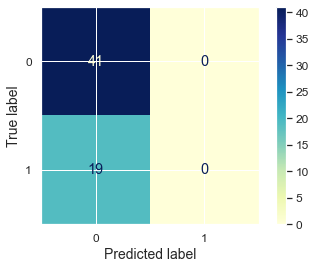

In [52]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

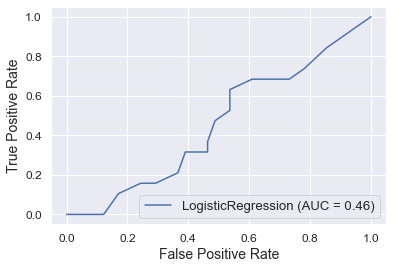

In [53]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

# -----------------------

### Part 5: Revised Solution and Analysis.  Write a few sentences describing how you improved on your solution, and whether or not it worked.

Using age + creatinine_phosphokinase + ejection_fraction + platelets + serum_creatinine + serum_sodium features has improved the model accuracy from 68% to 80% overall. 

In [54]:
df3.shape

(299, 7)

In [55]:
X = df3.iloc[:,:6]
y = df3.iloc[:,6]

In [56]:
Counter(y)

Counter({1: 96, 0: 203})

In [57]:
X.values, y.values

(array([[    75.  ,    582.  ,     20.  , 265000.  ,      1.9 ,    130.  ],
        [    55.  ,   7861.  ,     38.  , 263358.03,      1.1 ,    136.  ],
        [    65.  ,    146.  ,     20.  , 162000.  ,      1.3 ,    129.  ],
        ...,
        [    45.  ,   2060.  ,     60.  , 742000.  ,      0.8 ,    138.  ],
        [    45.  ,   2413.  ,     38.  , 140000.  ,      1.4 ,    140.  ],
        [    50.  ,    196.  ,     45.  , 395000.  ,      1.6 ,    136.  ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 6), (60, 6), (239,), (60,))

In [60]:
Counter(y_train), Counter(y_test)

(Counter({0: 162, 1: 77}), Counter({0: 41, 1: 19}))

In [61]:
scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)

In [63]:
X_train_scaled

array([[-0.87707363, -0.01900856,  2.06070657, -1.14420213, -0.55551222,
         0.76294718],
       [ 1.26950481, -0.33942493, -1.94550957, -1.3390776 , -0.19697206,
         0.10938311],
       [-0.87707363, -0.4138073 ,  0.01497918,  0.11274465, -0.2866071 ,
         0.10938311],
       ...,
       [-1.30638931, -0.2955584 , -0.24073675,  5.70567066, -0.10733702,
         1.19865656],
       [ 0.41087343, -0.48437519,  1.03784287, -0.74470742, -0.37624214,
         0.76294718],
       [-1.64984186, -0.4328797 ,  0.18545646,  1.06763446, -0.55551222,
         0.76294718]])

In [64]:
X_test_scaled = scaler.transform(X_test)

In [65]:
X_test_scaled

array([[-1.30638931, -0.01900856,  3.59500211, -0.01043584, -0.21489907,
         0.10938311],
       [ 0.84018912, -0.02949838,  0.61164966, -0.77393874, -0.19697206,
         0.54509249],
       [-0.44775794,  1.16157317,  0.01497918,  0.05428201, -0.19697206,
         0.54509249],
       [ 1.26950481, -0.47960709,  0.01497918, -0.39393157,  0.96828345,
        -0.54418096],
       [ 0.41087343,  0.27661368, -0.24073675, -0.01043584, -0.2866071 ,
         1.19865656],
       [ 2.55745187, -0.51679828,  1.03784287, -0.37444403, -0.37624214,
        -0.54418096],
       [ 2.90090442, -0.01900856,  0.01497918, -0.01043584,  0.36772869,
        -0.54418096],
       [-0.61948421, -0.52061276,  1.03784287,  0.4245454 , -0.64514726,
        -0.32632627],
       [-0.70534735, -0.44813763, -0.66692996, -0.45239421, -0.64514726,
        -0.10847158],
       [-0.44775794,  0.13929238,  0.61164966, -0.0139244 , -0.10733702,
         0.10938311],
       [ 0.84018912, -0.51107656,  0.61164966, -0.

In [66]:
lr2 = LogisticRegression(random_state=0)

In [67]:
lr2.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0)

In [68]:
lr2.coef_

array([[ 0.5309079 ,  0.20838467, -0.75285624, -0.02949059,  0.61895675,
        -0.27265063]])

In [69]:
lr2.intercept_

array([-0.92668178])

In [70]:
y_pred2 = lr2.predict(X_test_scaled)

In [71]:
y_pred2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        41
           1       0.82      0.47      0.60        19

    accuracy                           0.80        60
   macro avg       0.81      0.71      0.73        60
weighted avg       0.80      0.80      0.78        60



In [73]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[39,  2],
       [10,  9]], dtype=int64)

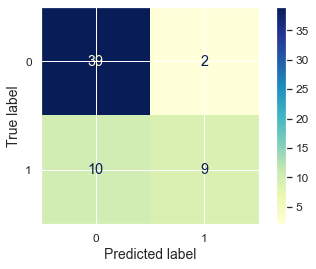

In [74]:
plot_confusion_matrix(estimator=lr2, X=X_test_scaled, y_true=y_test, cmap='YlGnBu')
plt.show()

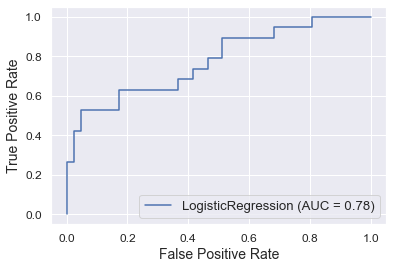

In [75]:
plot_roc_curve(estimator=lr2, X=X_test_scaled, y=y_test)
plt.show()

#### Python code done by Dennis Lam